### Import The required Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load The Data

In [58]:
df = pd.read_csv('house_price_regression_dataset.csv')
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [59]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


### Feature Engineering

In [60]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [61]:
selected_features = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms']
features = df[selected_features]
target = df['House_Price']


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

### Data Split

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target.values, test_size=0.2, random_state=42
)

### Linear Regression Model Train

In [63]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


Root Mean Squared Error: 29092.57
R2 Score: 0.99


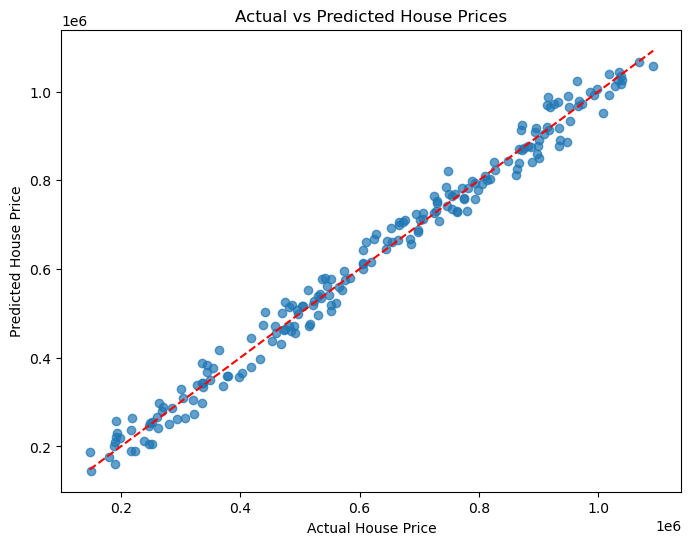

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

### Final Prediction model

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

price_bins = [0, 250000, 500000, 750000, 1000000, np.inf]
price_labels = ['0-250k', '250k-500k', '500k-750k', '750k-1M', '1M+']

y_test_binned = pd.cut(y_test, bins=price_bins, labels=price_labels)
y_pred_binned = pd.cut(y_pred, bins=price_bins, labels=price_labels)

accuracy = accuracy_score(y_test_binned, y_pred_binned)
precision = precision_score(y_test_binned, y_pred_binned, average='macro', zero_division=0)
recall = recall_score(y_test_binned, y_pred_binned, average='macro', zero_division=0)
f1 = f1_score(y_test_binned, y_pred_binned, average='macro', zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.86
Precision: 0.85
Recall: 0.85
F1 Score: 0.85


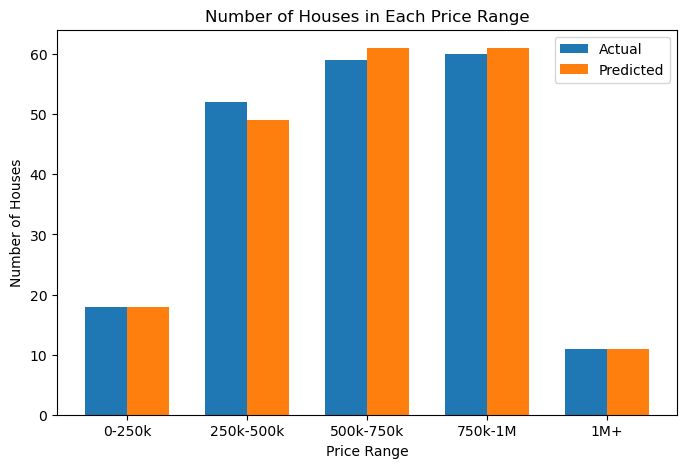

In [66]:
actual_counts = pd.Series(y_test_binned).value_counts().sort_index()
pred_counts = pd.Series(y_pred_binned).value_counts().sort_index()

plt.figure(figsize=(8,5))
bar_width = 0.35
index = np.arange(len(price_labels))
plt.bar(index, actual_counts, bar_width, label='Actual')
plt.bar(index + bar_width, pred_counts, bar_width, label='Predicted')
plt.xlabel('Price Range')
plt.ylabel('Number of Houses')
plt.title('Number of Houses in Each Price Range')
plt.xticks(index + bar_width/2, price_labels)
plt.legend()
plt.show()